# Exercise 7: Test Framework for Individual Project

In **Exercise 6** we implemented a simple frequency detection algorithm on an STM32, with the aim of detecting the dominant frequency of an analog voltage signal which was measured with the STM32's internal ADC. The frequency detection algorithm in question does the following:

1. Divides the input signal $x[n]$  into "windows" of length $N$ samples.
2. Calculates the one-sided DFT for real-valued signals (RFFT).
3. Identifies the highest peak location along the frequency axis (ignoring the DC component $X[0]$).
5. Returns peak location as frequency in Hz, which is calculated using the sampling frequency.

Run the cell below to load a python function wich performs this exact frequency detection operation on an array of arbitrary length:

In [2]:
# %load baseline_algorithm.py
import numpy as np
def freq_detection(x_n: np.ndarray, fs: int, N: int = 1024)->float:
    """
    Identifies the primary sinusoidal component in a signal x[n]
    over time by calculting successive N-point DFTs of x[n], and
    selecting the frequency component with the highest magnitude. 

    Parameters:
    x_n - signal samples x[n] to be analyzed
    fs - sampling frequency
    N - DFT window size in number of samples 
        Defaults to 1024 samples

    Returns:
    timestamps - ndarray of floats
        Points in time at which frequency contents were estimated.
    freqs - ndarray of floats
        Most prominent frequency detected for corresponding timestamp
        values.
    """
    timestamps = []
    freqs = []
    for window_start in range(0, len(x_n), N):
        window_end = window_start + N if len(x_n) >= N else len(x_n)
        x_slice = x_n[window_start:window_end]
        X_m = np.fft.rfft(x_slice, n = N)  # Calculate one-sided DFT
        X_m[0] = 0  # Set the DC component to 0
        m_peak = np.argmax(np.abs(X_m))  # Find the index of the highest peak in 'X_m'
        freqs.append(m_peak/N*fs)  # Convert frequency index to wave frequency 'f' in hertz
        timestamps.append(window_end/fs)
    return timestamps, freqs

We can conduct a simple test of this frequency detection function by generating a test signal of e.g. length $N$ samples for a given frequency $f$. To make it more interesting, we can also add some gaussian white noise to the measured signal to simulate external disturbances to the measurement.

Test parameters: 
* $N = 1024$ samples
* $fs = 10\ 000$ samples/second
* $f = 440$ Hz
* $A = 1V$
* $\sigma_n^2 = 1 V^2$ (Noise power)

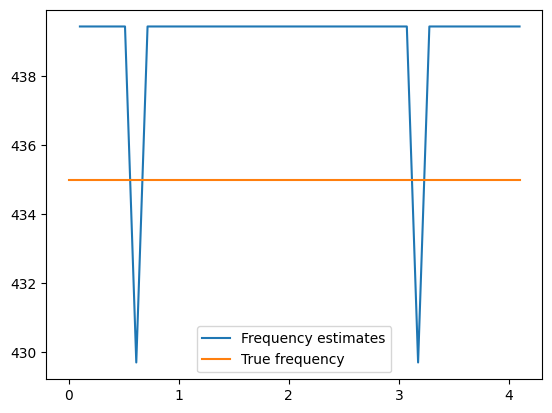

In [3]:
import matplotlib.pyplot as plt
# Test parameters 
fs = 10_000  # Samples/second
N = 4*fs  # Samples 
f = 435  # Hertz
A = 1  # Volts
noise_var = 1 # V^2

# Generate test signal
import numpy as np
t_n = np.arange(N)/fs  # Array of sample times
signal = A*np.sin(2*np.pi*f*t_n) # Pure sine tone 
noise = np.random.normal(scale=np.sqrt(noise_var), size=N)  # Gaussian noise
x_n = signal+noise  # Add noise to pure sine to create simulated signal

# Plot detected frequency vs. true frequency
t_est, f_est = freq_detection(x_n, fs)

plt.close(1); plt.figure(1)
plt.plot(t_est, f_est, label="Frequency estimates")
plt.plot([0, t_est[-1]], [f, f], label="True frequency")
plt.legend()

As we can see, even with some noise the frequency detection algorithm reports the presence of a frequeny which is fairly close to the true wave frequency, with an error determined mainly by the resolution bandwidth $\Delta f$ for the window size.

The first milestone for your individual project is to create a test framework for your improved frequency detection system which can simulate a variety of input signals, and subject the frequency detection algorithm to these test signals. The goal is to create a system for evaluating the performance of the frequency detection algorithm given a some of specific types of input signal. This way you can have a basis for evaluating the performance of your improved frequency detection system, using the frequency detection system from **Assignment 6** as expressed in `baseline_algorithm.py` as a basis for comparison.

|Test | Case |
|---|---|
|[Test 1](Test1_Frequency_Step.ipynb)| Tracking abrupt changes in frequency. |
|[Test 2](Test2_Pure_Sine.ipynb)| Sinusoidal signal with added noise.|
|[Test 3](Test3_Audio.ipynb)| "Real-world" signal with added noise.|
|[Test 4](Test4_Extra_cases.ipynb)| Optional, other useful tests you may think of.|